In [1]:
import zipfile
import os

In [2]:
def extract_zip(zip_path, extract_to):
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Giải nén thành công! Nội dung được lưu tại: {extract_to}")
    except zipfile.BadZipFile:
        print("Lỗi: File không phải là file zip hợp lệ.")
    except Exception as e:
        print("Đã xảy ra lỗi:", e)

In [3]:
zip_file_path = "../dataset/CelebAMask-HQ.zip"
extract_to_path = "../dataset/CelebAMask-HQ"

In [ ]:
extract_zip(zip_file_path, extract_to_path)

In [2]:
import os
import cv2
import numpy as np

In [3]:
base_dir = "../dataset/CelebAMask-HQ"
img_dir = os.path.join(base_dir, "CelebA-HQ-img")
mask_anno_dir = os.path.join(base_dir, "CelebAMask-HQ-mask-anno")

In [4]:
out_img_dir = "../dataset/preprocessed/imgs"
out_mask_dir = "../dataset/preprocessed/masks"
os.makedirs(out_img_dir, exist_ok=True)
os.makedirs(out_mask_dir, exist_ok=True)

In [5]:
from PIL import Image
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def get_skin_annotation_path(padded_in, anno_dir):
    target_filename = f"{padded_in}_skin.png"

    for sub in os.listdir(anno_dir):
        sub_path = os.path.join(anno_dir, sub)
        if os.path.isdir(sub_path):
            file_path = os.path.join(sub_path, target_filename)
            if os.path.exists(file_path):
                return file_path
    return None

In [7]:
def process_and_copy_sample(image_file, img_dir, anno_dir, processed_img_dir, processed_mask_dir):
    src_img_path = os.path.join(img_dir, image_file)
    try:
        _ = Image.open(src_img_path)
    except Exception as e:
        print(f"Không thể load ảnh {src_img_path}: {e}")
        return
    base_id = os.path.splitext(image_file)[0]
    padded_id = base_id.zfill(5)
    ann_path = get_skin_annotation_path(padded_id, anno_dir)
    if ann_path is None:
        print(f"Không tìm thấy annotation 'skin' cho ảnh {image_file}")
        return
    dest_img_path = os.path.join(processed_img_dir, image_file)
    dest_ann_filename = f"{padded_id}_skin.png"
    dest_ann_path = os.path.join(processed_mask_dir, dest_ann_filename)

    # Sao chép các file
    try:
        shutil.copyfile(src_img_path, dest_img_path)
        shutil.copyfile(ann_path, dest_ann_path)
        print(f"Đã sao chép {image_file}: Image -> {dest_img_path}, Annotation -> {dest_ann_path}")
    except Exception as e:
        print(f"Lỗi khi sao chép {image_file}: {e}")

In [8]:
image_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(".jpg")], key=lambda x: int(os.path.splitext(x)[0]))
print(f"Tổng số ảnh gốc: {len(image_files)}")

Tổng số ảnh gốc: 30000


In [9]:
for image_file in image_files:
    process_and_copy_sample(image_file, img_dir, mask_anno_dir, out_img_dir, out_mask_dir)


Đã sao chép 0.jpg: Image -> ../dataset/preprocessed/imgs\0.jpg, Annotation -> ../dataset/preprocessed/masks\00000_skin.png
Đã sao chép 1.jpg: Image -> ../dataset/preprocessed/imgs\1.jpg, Annotation -> ../dataset/preprocessed/masks\00001_skin.png
Đã sao chép 2.jpg: Image -> ../dataset/preprocessed/imgs\2.jpg, Annotation -> ../dataset/preprocessed/masks\00002_skin.png
Đã sao chép 3.jpg: Image -> ../dataset/preprocessed/imgs\3.jpg, Annotation -> ../dataset/preprocessed/masks\00003_skin.png
Đã sao chép 4.jpg: Image -> ../dataset/preprocessed/imgs\4.jpg, Annotation -> ../dataset/preprocessed/masks\00004_skin.png
Đã sao chép 5.jpg: Image -> ../dataset/preprocessed/imgs\5.jpg, Annotation -> ../dataset/preprocessed/masks\00005_skin.png
Đã sao chép 6.jpg: Image -> ../dataset/preprocessed/imgs\6.jpg, Annotation -> ../dataset/preprocessed/masks\00006_skin.png
Đã sao chép 7.jpg: Image -> ../dataset/preprocessed/imgs\7.jpg, Annotation -> ../dataset/preprocessed/masks\00007_skin.png
Đã sao chép 8.jp

In [13]:
import os

# Đường dẫn tới thư mục chứa các file mask
mask_folder = "../dataset/preprocessed/masks"

# Duyệt qua tất cả file trong thư mục mask
for filename in os.listdir(mask_folder):
    if filename.endswith("_skin.png"):
        # Lấy phần số từ tên file, ví dụ "00000_skin.png" -> "00000"
        padded_number = filename.split("_")[0]
        # Chuyển sang số nguyên, để loại bỏ các số 0 đầu
        number = int(padded_number)
        # Tạo tên file mới, ví dụ: "0.png"
        new_filename = f"{number}.png"
        old_path = os.path.join(mask_folder, filename)
        new_path = os.path.join(mask_folder, new_filename)
        # Đổi tên file
        os.rename(old_path, new_path)
        print(f"Đã đổi tên: {filename} -> {new_filename}")

Đã đổi tên: 00000_skin.png -> 0.png
Đã đổi tên: 00001_skin.png -> 1.png
Đã đổi tên: 00002_skin.png -> 2.png
Đã đổi tên: 00003_skin.png -> 3.png
Đã đổi tên: 00004_skin.png -> 4.png
Đã đổi tên: 00005_skin.png -> 5.png
Đã đổi tên: 00006_skin.png -> 6.png
Đã đổi tên: 00007_skin.png -> 7.png
Đã đổi tên: 00008_skin.png -> 8.png
Đã đổi tên: 00009_skin.png -> 9.png
Đã đổi tên: 00010_skin.png -> 10.png
Đã đổi tên: 00011_skin.png -> 11.png
Đã đổi tên: 00012_skin.png -> 12.png
Đã đổi tên: 00013_skin.png -> 13.png
Đã đổi tên: 00014_skin.png -> 14.png
Đã đổi tên: 00015_skin.png -> 15.png
Đã đổi tên: 00016_skin.png -> 16.png
Đã đổi tên: 00017_skin.png -> 17.png
Đã đổi tên: 00018_skin.png -> 18.png
Đã đổi tên: 00019_skin.png -> 19.png
Đã đổi tên: 00020_skin.png -> 20.png
Đã đổi tên: 00021_skin.png -> 21.png
Đã đổi tên: 00022_skin.png -> 22.png
Đã đổi tên: 00023_skin.png -> 23.png
Đã đổi tên: 00024_skin.png -> 24.png
Đã đổi tên: 00025_skin.png -> 25.png
Đã đổi tên: 00026_skin.png -> 26.png
Đã đổi tên:

Hiển thị 5 mẫu.


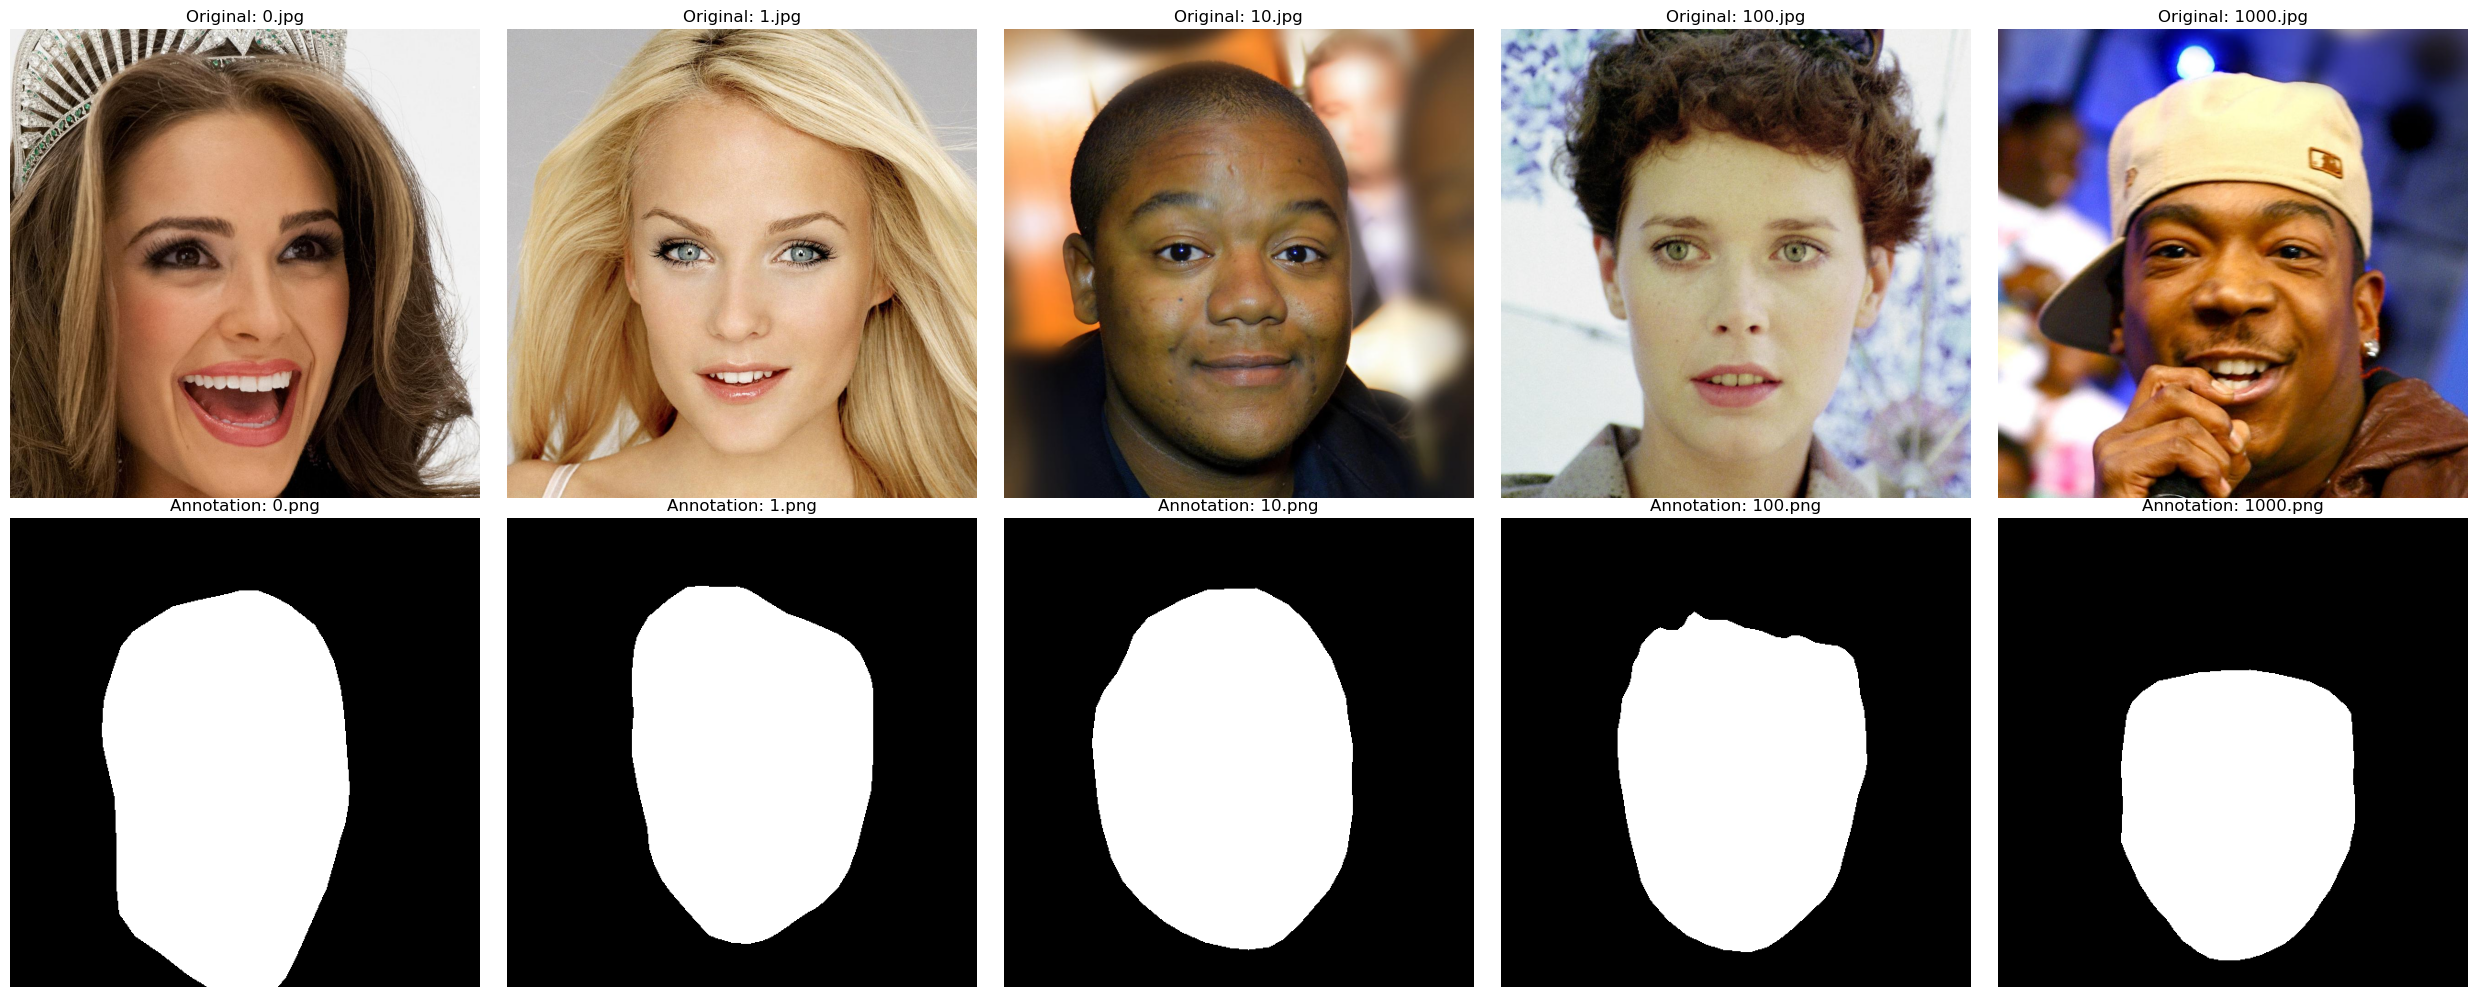

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa ảnh gốc và annotation
processed_img_dir = "../dataset/preprocessed/imgs"
processed_mask_dir = "../dataset/preprocessed/masks"

# Lấy danh sách các file ảnh (giả sử ảnh gốc có đuôi .jpg hoặc .png)
img_files = sorted([f for f in os.listdir(processed_img_dir) if f.lower().endswith((".jpg", ".png"))])
mask_files = sorted([f for f in os.listdir(processed_mask_dir) if f.lower().endswith((".jpg", ".png"))])

# Chọn 5 ảnh đầu tiên (nếu số file < 5 thì lấy tất cả)
num_samples = min(5, len(img_files), len(mask_files))
print(f"Hiển thị {num_samples} mẫu.")

# Tạo figure với 2 hàng và num_samples cột
fig, axs = plt.subplots(2, num_samples, figsize=(5 * num_samples, 10))

for i in range(num_samples):
    img_path = os.path.join(processed_img_dir, img_files[i])
    mask_path = os.path.join(processed_mask_dir, mask_files[i])

    # Đọc ảnh gốc (OpenCV đọc ảnh theo định dạng BGR)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Không thể load ảnh: {img_path}")
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Đọc annotation mask (ảnh grayscale)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Không thể load mask: {mask_path}")
        continue

    # Hiển thị ảnh gốc trên hàng đầu tiên
    axs[0, i].imshow(img_rgb)
    axs[0, i].set_title(f"Original: {img_files[i]}")
    axs[0, i].axis("off")

    # Hiển thị annotation trên hàng thứ hai
    axs[1, i].imshow(mask, cmap="gray")
    axs[1, i].set_title(f"Annotation: {mask_files[i]}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()
